In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# A simple Example

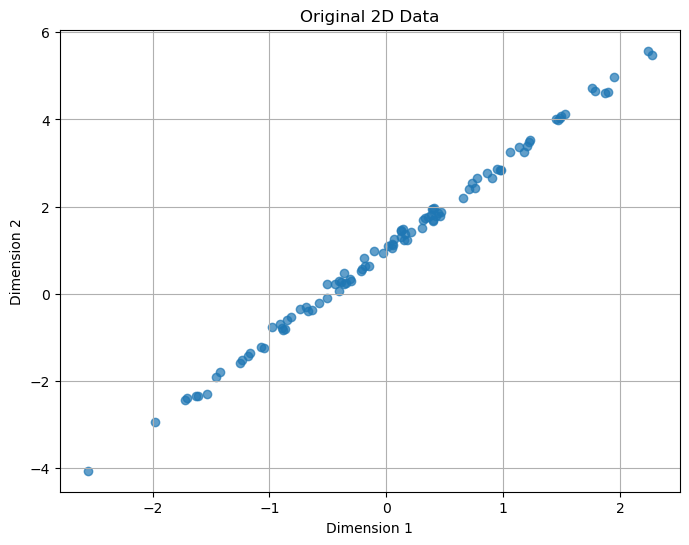

array([[1.76405235, 4.71641976],
       [0.40015721, 1.66553851],
       [0.97873798, 2.83042747],
       [2.2408932 , 5.57872607],
       [1.86755799, 4.61780364]])

In [9]:
from sklearn.decomposition import PCA

# Step 1: Create a 2D dataset
np.random.seed(0) # For reproducibility
X1 = np.random.normal(loc=0, scale=1, size=100) # Generate 100 data points for the first dimension
noise = np.random.normal(loc=0, scale=0.1, size=100) # Noise to add to the second dimension
X2 = 2 * X1 + 1 + noise # Generate the second dimension with a linear relationship to the first
data_2d = np.column_stack((X1, X2))

# Visualize the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.7)
plt.title('Original 2D Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

data_2d[:5] # Show the first 5 data points for reference


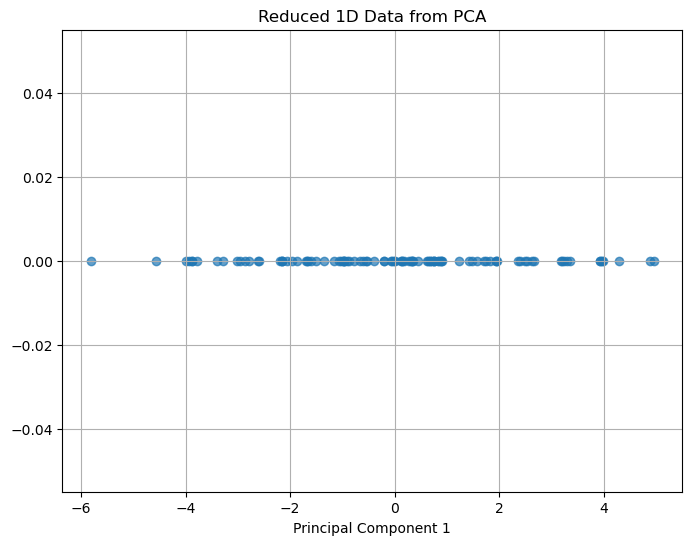

array([[3.97213576],
       [0.63295967],
       [1.93362168],
       [4.95652407],
       [3.92979581]])

In [10]:
# Step 2: Perform PCA to reduce the data from 2D to 1D
pca = PCA(n_components=1)
data_reduced = pca.fit_transform(data_2d)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(data_reduced[:, 0], np.zeros_like(data_reduced[:, 0]), alpha=0.7)
plt.title('Reduced 1D Data from PCA')
plt.xlabel('Principal Component 1')
plt.grid(True)
plt.show()

data_reduced[:5] # Show the first 5 data points for reference


In [11]:
# Step 3: Run Regression

# Generating a new response variable Y' with a linear relationship to X1 and X2
np.random.seed(1)  # Ensure reproducibility
Y = 3 * X1 - 2 * X2 + np.random.normal(loc=0, scale=0.5, size=100)

# Regression analysis using statsmodels

# Multiple Linear Regression with X1 and X2
X_mult = sm.add_constant(data_2d)  # Adding a constant for the intercept
model_mult = sm.OLS(Y, X_mult).fit()

# Linear Regression with PC1
X_pc1 = sm.add_constant(data_reduced)  # Adding a constant for the intercept
model_pc1 = sm.OLS(Y, X_pc1).fit()

# Summaries of both models
summary_mult = model_mult.summary()
summary_pc1 = model_pc1.summary()

In [12]:
summary_mult

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 09 May 2025   Prob (F-statistic):           3.58e-39
Time:                        00:40:30   Log-Likelihood:                -58.899
No. Observations:                 100   AIC:                             123.8
Df Residuals:                      97   BIC:                             131.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3856      0.436      0.884      0.379      -0.480       1.251
x1             3.7828      0.867      4.362      0.000       2.061       5.504
x2            -2.3566      0.431     -5.472      0.000      -3.211      -1.502
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.071
Skew:                           0.058   Prob(JB):                        0.965
Kurtosis:                       3.059   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
summary_pc1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     401.9
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.90e-36
Time:                        00:40:30   Log-Likelihood:                -68.696
No. Observations:                 100   AIC:                             141.4
Df Residuals:                      98   BIC:                             146.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0459      0.049    -42.111      0.000      -2.142      -1.950
x1            -0.4298      0.021    -20.046      0.000      -0.472      -0.387
==============================================================================
Omnibus:                        2.168   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                1.749
Skew:                          -0.318   Prob(JB):                        0.417
Kurtosis:                       3.119   Cond. No.                         2.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

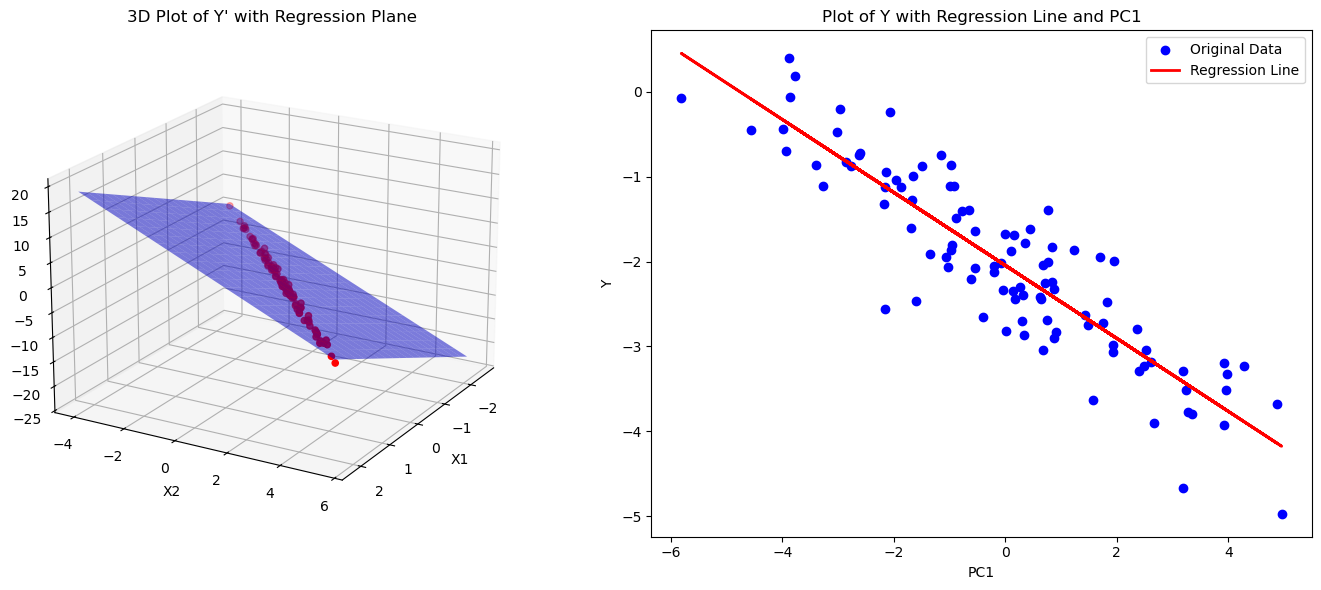

In [14]:
# Plotting the 3D data points with the regression plane for Y' with X1 and X2

fig = plt.figure(figsize=(14, 6))

# 3D plot for Y' with X1 and X2 and regression plane
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data_2d[:, 0], data_2d[:, 1], Y, c='r', marker='o', label='Original Data')

# Creating a meshgrid for the regression plane
x1_range = np.linspace(data_2d[:, 0].min(), data_2d[:, 0].max(), num=20)
x2_range = np.linspace(data_2d[:, 1].min(), data_2d[:, 1].max(), num=20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = model_mult.params[0] + model_mult.params[1] * x1_grid + model_mult.params[2] * x2_grid

# Plotting the regression plane
ax1.plot_surface(x1_grid, x2_grid, y_grid, color='blue', alpha=0.5)
ax1.set_title('3D Plot of Y\' with Regression Plane')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
# Rotating the view
ax1.view_init(elev=20, azim=30)  # Elev and Azim are the elevation and azimuthal angles

# 2D plot for Y' with PC1 including regression line
Y_pred_pc1 = model_pc1.predict(X_pc1)
ax2 = fig.add_subplot(122)
ax2.scatter(data_reduced, Y, c='b', marker='o', label='Original Data')
ax2.plot(data_reduced, Y_pred_pc1, color='red', linewidth=2, label='Regression Line')
ax2.set_title('Plot of Y with Regression Line and PC1')
ax2.set_xlabel('PC1')
ax2.set_ylabel('Y')
ax2.legend()

plt.tight_layout()
plt.show()


# Another demonstration of PCA

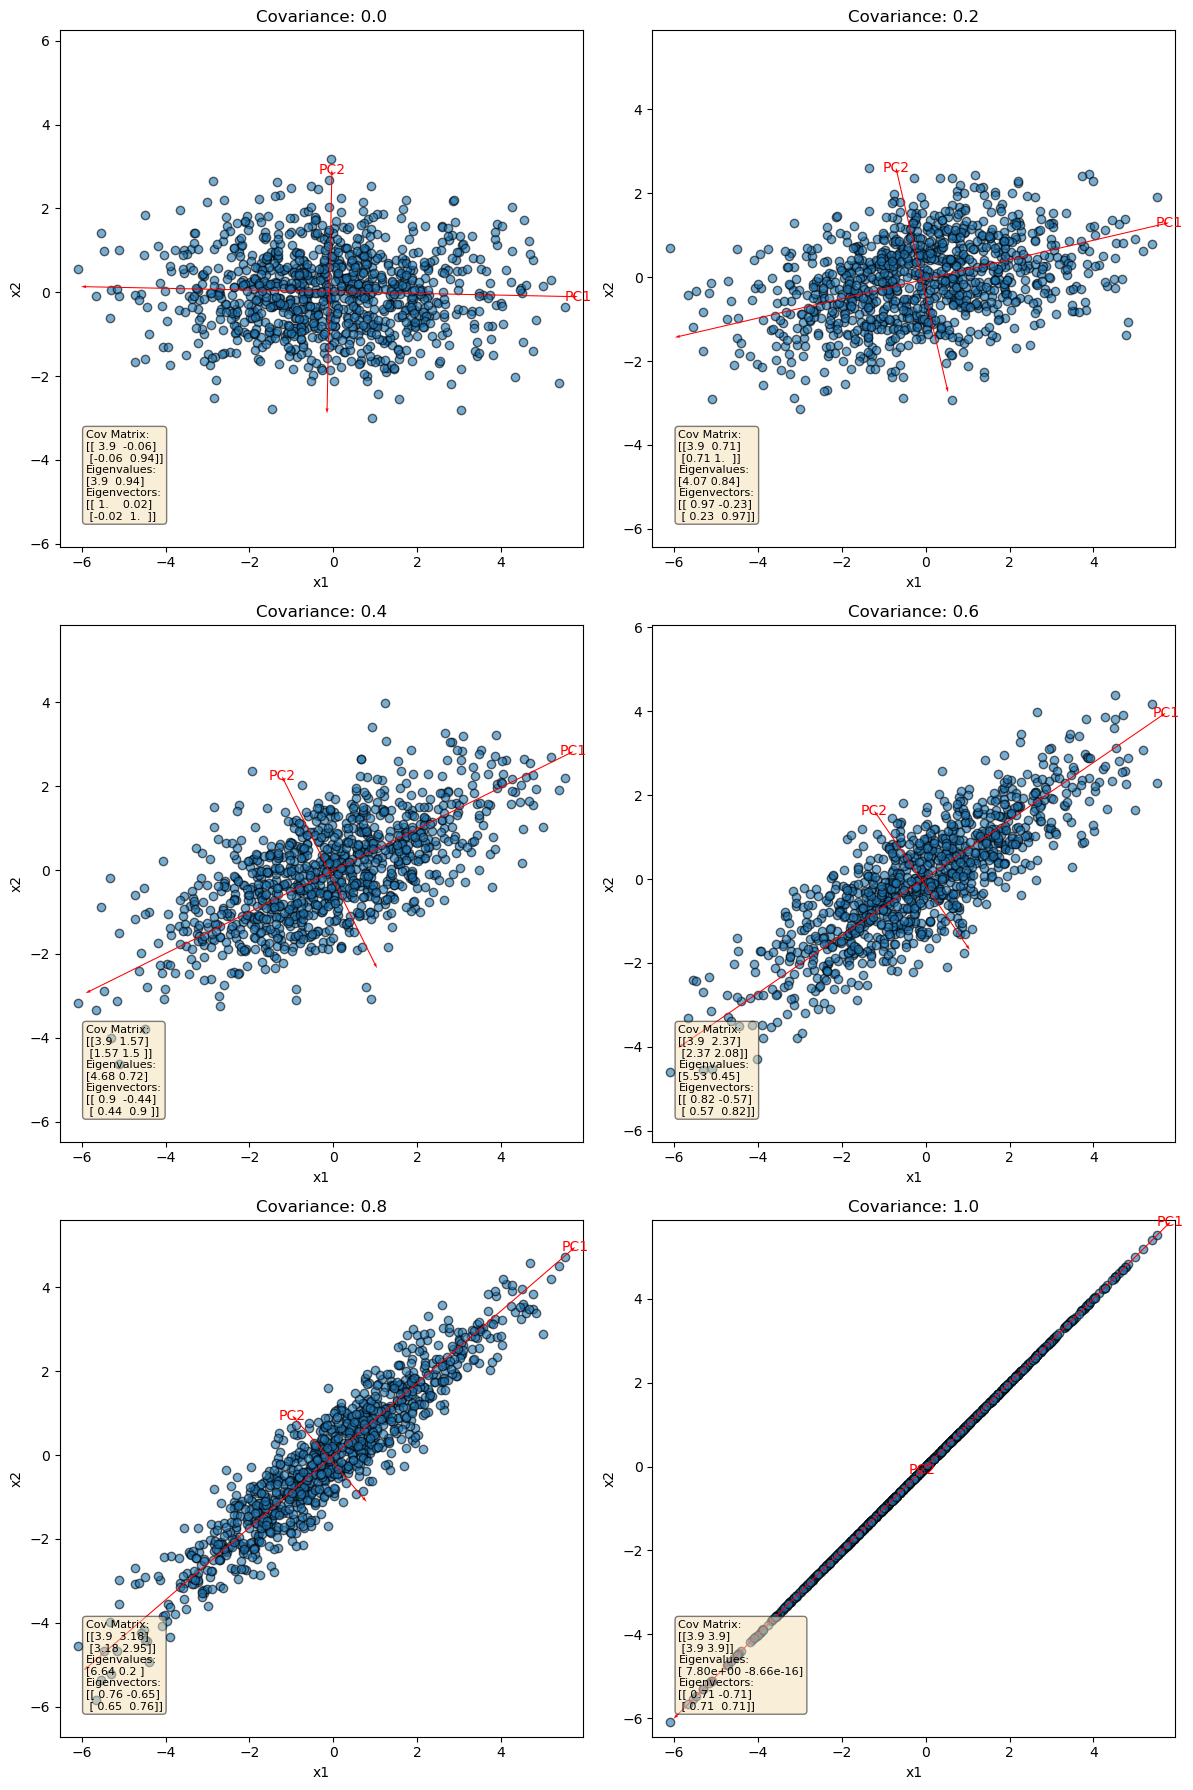

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Set random seed for reproducibility
np.random.seed(0)

# Generate 1000 samples for each vector
n_samples = 1000

# Base vector x1 with variance 4 (std dev 2)
x1 = np.random.normal(0, 2, n_samples)

# Generate x2 with varying covariance to x1 and different variance
covariances = np.arange(0, 1.1, 0.2)  # Increment from 0 to 1 with a step of 0.2
variance_x2 = 1  # Variance for x2, std dev 1

# Create a figure and axes
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.ravel()

for i, cov in enumerate(covariances):
    # Generate x2 based on the desired covariance with x1
    x2 = cov * x1 + np.random.normal(0, np.sqrt(variance_x2 - cov**2), n_samples)

    # Combine x1 and x2 into a single dataset
    X = np.vstack((x1, x2)).T

    # Fit PCA
    pca = PCA(n_components=2)
    pca.fit(X)
    components = pca.components_
    means = pca.mean_
    explained_variance = pca.explained_variance_
    covariance_matrix = np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Plot data points
    ax = axes[i]
    ax.scatter(X[:, 0], X[:, 1], alpha=0.6, edgecolor='k')
    ax.set_title(f'Covariance: {cov:.1f}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.axis('equal')

    # Plot full PCA lines and mark them
    for j, (length, vector) in enumerate(zip(explained_variance, components)):
        v = vector * 3 * np.sqrt(length)
        ax.quiver(means[0], means[1], v[0], v[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.002)
        ax.quiver(means[0], means[1], -v[0], -v[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.002)
        ax.text(means[0] + v[0], means[1] + v[1], f'PC{j+1}', color='red', ha='center', va='center')

    # Print covariance matrix and eigenvalues/vectors in the corner of the subplot
    textstr = f'Cov Matrix:\n{np.array2string(covariance_matrix, precision=2)}\n'
    textstr += f'Eigenvalues:\n{np.array2string(eigenvalues, precision=2)}\n'
    textstr += f'Eigenvectors:\n{np.array2string(eigenvectors, precision=2)}'
    ax.text(0.05, 0.05, textstr, transform=ax.transAxes, fontsize=8,
            verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


# Load Datasets

In [16]:
target = [5630,5755,6094,6722,7524,8594,8759,12123,13827,15968,18576,19251,23052,26769,29317,31936,35397,39195,43618,48796]
x1 = [78803,83818,89367,99066,109276,120480,136576,161415,185999,219029,270844,321501,348499,411265,484753,539117,590422,644791,686450,740599]
x2 = [1219,1319,1453,1609,1802,2053,2383,2694,3160,3697,4358,5100,6281,7802,9356,10933,12670,14598,16285,18575]
x3 = [910927,994130,998921,994000,1036737,1063238,1034276,1155219,1142569,1147337,1295543,1341674,1425186,1695000,1996184,1995402,2602850,2870004,2922796,3520129]
x4 = [93308,95085,100164,105073,105155,105606,97260,111764,115583,125656,135670,146193,152451,167609,186226,189337,210597,230460,253484,281405]
x5 = [644,695,719,744,784,878,870,1102,1212,1394,1610,1712,1902,2103,2641,2957,3262,3611,4000,4440]

In [17]:
df_x = pd.DataFrame(list(zip(x1,x2,x3,x4,x5)),columns=['x1','x2','x3','x4','x5'])

In [18]:
df_x.head(8)

,x1,x2,x3,x4,x5
0,78803,1219,910927,93308,644
1,83818,1319,994130,95085,695
2,89367,1453,998921,100164,719
3,99066,1609,994000,105073,744
4,109276,1802,1036737,105155,784
5,120480,2053,1063238,105606,878
6,136576,2383,1034276,97260,870
7,161415,2694,1155219,111764,1102


# PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
# First standarize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_x)
X = scaler.transform(df_x)

In [21]:
pca = PCA(n_components=5)
pca.fit(X)

PCA(n_components=5)

In [22]:
pca_X = pca.transform(X)

print('Original variables:')
print(X[:5])
print('Principal components:')
print(pca_X[:5])

Original variables:
[[-1.08124563 -0.9582024  -0.91120889 -1.02342954 -1.03251046]
 [-1.05839508 -0.93959056 -0.80230686 -0.99157749 -0.98934814]
 [-1.03311139 -0.9146507  -0.79603606 -0.90053834 -0.96903645]
 [-0.98891847 -0.88561624 -0.80247702 -0.81254637 -0.94787845]
 [-0.94239721 -0.8496954  -0.74653978 -0.81107656 -0.91402565]]
Principal components:
[[-2.23911567  0.12437751 -0.02044728  0.03027781 -0.02424569]
 [-2.13852452  0.18381989 -0.04025636  0.00512461  0.00622853]
 [-2.06334478  0.17207536  0.0224991  -0.00547307 -0.00645176]
 [-1.98453714  0.13903106  0.07921226 -0.01759146 -0.02547645]
 [-1.90696859  0.14698501  0.03918968 -0.02362789 -0.02183102]]


In [23]:
# Each pricipal components also have 0 mean
pc_mean = np.mean(pca_X,axis=0)
print(pc_mean)

[-8.88178420e-17 -5.55111512e-18 -9.02056208e-18 -8.23993651e-18
 -2.13370988e-17]


In [24]:
# This shows the matrix phi for the transformation
pca.components_

array([[ 0.44563655,  0.44890755,  0.44450167,  0.44833596,  0.44866827],
       [-0.63394479,  0.08219043,  0.74069083,  0.01943935, -0.20581042],
       [-0.36118173, -0.15856436, -0.32097481,  0.86068123, -0.02465961],
       [-0.50133428,  0.58288077, -0.35313756, -0.22079147,  0.48524112],
       [-0.13316816, -0.65332541,  0.1614447 , -0.09537261,  0.7212987 ]])

In [25]:
# The percentage variance explained for each principal components
print(pca.explained_variance_ratio_)

[9.90706283e-01 7.42310400e-03 1.12674449e-03 4.72183966e-04
 2.71684452e-04]


## Manually do PCA: Eigendecomposition

In [26]:
# Get the eigenvalue and eigenvector of the matrix X
eig_val, eig_vec = np.linalg.eig(np.cov(X.T))

In [27]:
# % Variance expalined. Just the normalized eigenvalues
for e in eig_val:
    print(e/eig_val.sum())

0.990706283089994
0.007423103997841563
0.0011267444937409932
0.00047218396598925586
0.00027168445243428384


In [28]:
eig_vec.T   # the eigen vectors are the same as the phis we obtained from pca.components_. 
            # This signs may differ, but multiply by -1 are still eigenvectors 

array([[ 0.44563655,  0.44890755,  0.44450167,  0.44833596,  0.44866827],
       [-0.63394479,  0.08219043,  0.74069083,  0.01943935, -0.20581042],
       [-0.36118173, -0.15856436, -0.32097481,  0.86068123, -0.02465961],
       [ 0.50133428, -0.58288077,  0.35313756,  0.22079147, -0.48524112],
       [-0.13316816, -0.65332541,  0.1614447 , -0.09537261,  0.7212987 ]])

In [29]:
# Recall from above
pca.components_

array([[ 0.44563655,  0.44890755,  0.44450167,  0.44833596,  0.44866827],
       [-0.63394479,  0.08219043,  0.74069083,  0.01943935, -0.20581042],
       [-0.36118173, -0.15856436, -0.32097481,  0.86068123, -0.02465961],
       [-0.50133428,  0.58288077, -0.35313756, -0.22079147,  0.48524112],
       [-0.13316816, -0.65332541,  0.1614447 , -0.09537261,  0.7212987 ]])

In [30]:
np.matmul(X, eig_vec)[:5]

array([[-2.23911567,  0.12437751, -0.02044728, -0.03027781, -0.02424569],
       [-2.13852452,  0.18381989, -0.04025636, -0.00512461,  0.00622853],
       [-2.06334478,  0.17207536,  0.0224991 ,  0.00547307, -0.00645176],
       [-1.98453714,  0.13903106,  0.07921226,  0.01759146, -0.02547645],
       [-1.90696859,  0.14698501,  0.03918968,  0.02362789, -0.02183102]])

In [31]:
pca_X[:5]   # The same! 

array([[-2.23911567,  0.12437751, -0.02044728,  0.03027781, -0.02424569],
       [-2.13852452,  0.18381989, -0.04025636,  0.00512461,  0.00622853],
       [-2.06334478,  0.17207536,  0.0224991 , -0.00547307, -0.00645176],
       [-1.98453714,  0.13903106,  0.07921226, -0.01759146, -0.02547645],
       [-1.90696859,  0.14698501,  0.03918968, -0.02362789, -0.02183102]])

# Make some plots

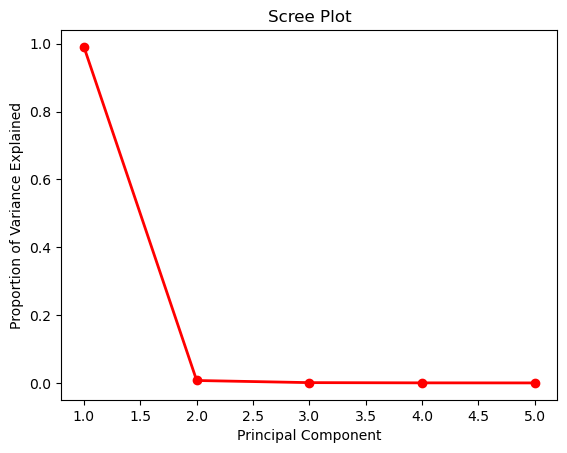

In [32]:
# Making the scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Let's make a plot if we only use the first 2 PCs. That means we reduce the dimensions from 5 to 2

In [33]:
PC_1 = pca_X[:,0]
PC_2 = pca_X[:,1]

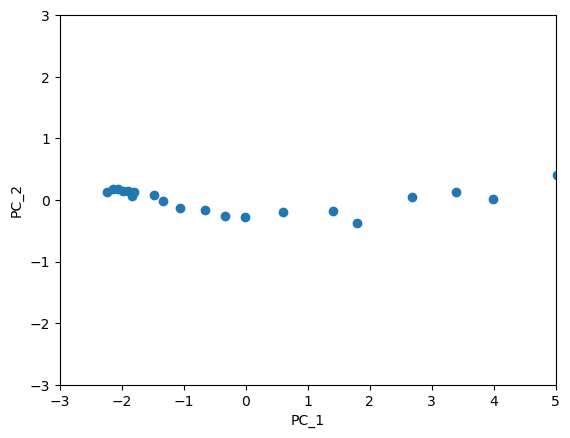

In [34]:
# We see that most of the variances are on PC1
plt.scatter(PC_1, PC_2)
plt.xlim(-3,5)
plt.ylim(-3,3)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.show()

## Link Singular Value Decomposition (SVD) to PCA

In [35]:
# Let's comfirm that we can also use SVD to obtain PCA
U,S,V = np.linalg.svd(X)

In [36]:
V   # this one = eigen vectors = from pca.components_

array([[ 0.44563655,  0.44890755,  0.44450167,  0.44833596,  0.44866827],
       [-0.63394479,  0.08219043,  0.74069083,  0.01943935, -0.20581042],
       [ 0.36118173,  0.15856436,  0.32097481, -0.86068123,  0.02465961],
       [ 0.50133428, -0.58288077,  0.35313756,  0.22079147, -0.48524112],
       [-0.13316816, -0.65332541,  0.1614447 , -0.09537261,  0.7212987 ]])

In [37]:
# First represent the S as the singular value matrix which has dim (20,5)
S_diag = np.zeros((20,5))
S_diag[:5, :5] = np.diag(S)
S_diag

array([[9.95342294, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.86157437, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33567015, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.21729794, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.16482853],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.

In [38]:
np.matmul(U, S_diag)[:5]

array([[-2.23911567,  0.12437751,  0.02044728, -0.03027781, -0.02424569],
       [-2.13852452,  0.18381989,  0.04025636, -0.00512461,  0.00622853],
       [-2.06334478,  0.17207536, -0.0224991 ,  0.00547307, -0.00645176],
       [-1.98453714,  0.13903106, -0.07921226,  0.01759146, -0.02547645],
       [-1.90696859,  0.14698501, -0.03918968,  0.02362789, -0.02183102]])

In [39]:
pca_X[:5]   # The same! 

array([[-2.23911567,  0.12437751, -0.02044728,  0.03027781, -0.02424569],
       [-2.13852452,  0.18381989, -0.04025636,  0.00512461,  0.00622853],
       [-2.06334478,  0.17207536,  0.0224991 , -0.00547307, -0.00645176],
       [-1.98453714,  0.13903106,  0.07921226, -0.01759146, -0.02547645],
       [-1.90696859,  0.14698501,  0.03918968, -0.02362789, -0.02183102]])

# PCR

In [40]:
# First standarize the data
from sklearn.preprocessing import StandardScaler
scaler_y = StandardScaler()
y_ori = np.array(target).reshape(-1,1)
scaler_y.fit(y_ori)
y = scaler_y.transform(y_ori)

In [41]:
# create a data frame
df_pca = pd.DataFrame(pca_X,columns=['z_1','z_2','z_3','z_4','z_5'])
df_pca['y'] = y

In [42]:
df_pca.head()

,z_1,z_2,z_3,z_4,z_5,y
0,-2.239116,0.124378,-0.020447,0.030278,-0.024246,-1.099130
1,-2.138525,0.183820,-0.040256,0.005125,0.006229,-1.089794
2,-2.063345,0.172075,0.022499,-0.005473,-0.006452,-1.064473
3,-1.984537,0.139031,0.079212,-0.017591,-0.025476,-1.017565
4,-1.906969,0.146985,0.039190,-0.023628,-0.021831,-0.957660


In [43]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1', data=df_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1267.
Date:                Fri, 09 May 2025   Prob (F-statistic):           3.87e-18
Time:                        00:40:32   Log-Likelihood:                 14.303
No. Observations:                  20   AIC:                            -24.61
Df Residuals:                      18   BIC:                            -22.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.249e-16      0.028  -4.48e-15      1.000      -0.059       0.059
z_1            0.4461      0.013     35.596      0.000       0.420       0.472
==============================================================================
Omnibus:                        3.776   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                1.863
Skew:                           0.449   Prob(JB):                        0.394
Kurtosis:                       1.805   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1 + z_2', data=df_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1826.
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.45e-20
Time:                        00:40:32   Log-Likelihood:                 25.366
No. Observations:                  20   AIC:                            -44.73
Df Residuals:                      17   BIC:                            -41.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.249e-16      0.017  -7.57e-15      1.000      -0.035       0.035
z_1            0.4461      0.007     60.147      0.000       0.430       0.462
z_2           -0.5025      0.086     -5.865      0.000      -0.683      -0.322
==============================================================================
Omnibus:                        4.252   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                1.705
Skew:                           0.325   Prob(JB):                        0.426
Kurtosis:                       1.726   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1 + z_2 + z_3', data=df_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1278.
Date:                Fri, 09 May 2025   Prob (F-statistic):           2.97e-19
Time:                        00:40:32   Log-Likelihood:                 26.450
No. Observations:                  20   AIC:                            -44.90
Df Residuals:                      16   BIC:                            -40.92
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.249e-16      0.016  -7.75e-15      1.000      -0.034       0.034
z_1            0.4461      0.007     61.601      0.000       0.431       0.462
z_2           -0.5025      0.084     -6.006      0.000      -0.680      -0.325
z_3            0.2906      0.215      1.353      0.195      -0.165       0.746
==============================================================================
Omnibus:                        4.280   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                1.540
Skew:                           0.201   Prob(JB):                        0.463
Kurtosis:                       1.701   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Partial Least Squares

In [46]:
from sklearn.cross_decomposition import PLSRegression

In [47]:
# First standarize the data
from sklearn.preprocessing import StandardScaler
y_ori = np.array(target).reshape(-1,1)

scaler_x, scaler_y = StandardScaler(), StandardScaler()
scaler_x.fit(df_x)
scaler_y.fit(y_ori)
X = scaler_x.transform(df_x)
y = scaler_y.transform(y_ori)

In [48]:
# Fit PLS
pls = PLSRegression(n_components=5)
pls.fit(X, y)

PLSRegression(n_components=5)

In [49]:
# Transform to PLS variables
pls_X = pls.transform(X)

In [50]:
# create a data frame
df_pls = pd.DataFrame(pls_X,columns=['z_1','z_2','z_3','z_4','z_5'])
df_pls['y'] = y

In [51]:
df_pls.head()

,z_1,z_2,z_3,z_4,z_5,y
0,-2.183385,0.122991,-0.025683,0.029531,0.017016,-1.099130
1,-2.085842,0.181683,-0.034748,-0.007235,0.006888,-1.089794
2,-2.012427,0.165066,0.022492,0.006254,-0.007424,-1.064473
3,-1.935307,0.128397,0.072408,0.025037,-0.025775,-1.017565
4,-1.859799,0.139450,0.035907,0.017454,-0.029984,-0.957660


In [52]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1', data=df_pls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1280.
Date:                Fri, 09 May 2025   Prob (F-statistic):           3.54e-18
Time:                        00:40:32   Log-Likelihood:                 14.405
No. Observations:                  20   AIC:                            -24.81
Df Residuals:                      18   BIC:                            -22.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.249e-16      0.028   -4.5e-15      1.000      -0.058       0.058
z_1            0.4578      0.013     35.779      0.000       0.431       0.485
==============================================================================
Omnibus:                        3.749   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                1.864
Skew:                           0.452   Prob(JB):                        0.394
Kurtosis:                       1.808   Cond. No.                         2.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1 + z_2', data=df_pls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1884.
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.11e-20
Time:                        00:40:32   Log-Likelihood:                 25.677
No. Observations:                  20   AIC:                            -45.35
Df Residuals:                      17   BIC:                            -42.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.249e-16      0.016  -7.68e-15      1.000      -0.034       0.034
z_1            0.4578      0.007     61.095      0.000       0.442       0.474
z_2           -0.5174      0.087     -5.957      0.000      -0.701      -0.334
==============================================================================
Omnibus:                        4.156   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                1.672
Skew:                           0.315   Prob(JB):                        0.433
Kurtosis:                       1.731   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1 + z_2 + z_3', data=df_pls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1292.
Date:                Fri, 09 May 2025   Prob (F-statistic):           2.72e-19
Time:                        00:40:32   Log-Likelihood:                 26.562
No. Observations:                  20   AIC:                            -45.12
Df Residuals:                      16   BIC:                            -41.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.249e-16      0.016  -7.79e-15      1.000      -0.034       0.034
z_1            0.4578      0.007     61.953      0.000       0.442       0.473
z_2           -0.5174      0.086     -6.040      0.000      -0.699      -0.336
z_3            0.2719      0.223      1.217      0.241      -0.202       0.746
==============================================================================
Omnibus:                        3.867   Durbin-Watson:                   1.314
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                1.482
Skew:                           0.206   Prob(JB):                        0.477
Kurtosis:                       1.732   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
import statsmodels.formula.api as smf
model = smf.ols(formula='y ~ z_1', data=df_pls).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1280.
Date:                Fri, 09 May 2025   Prob (F-statistic):           3.54e-18
Time:                        00:40:32   Log-Likelihood:                 14.405
No. Observations:                  20   AIC:                            -24.81
Df Residuals:                      18   BIC:                            -22.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.249e-16      0.028   -4.5e-15      1.000      -0.058       0.058
z_1            0.4578      0.013     35.779      0.000       0.431       0.485
==============================================================================
Omnibus:                        3.749   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                1.864
Skew:                           0.452   Prob(JB):                        0.394
Kurtosis:                       1.808   Cond. No.                         2.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""